<a href="https://colab.research.google.com/github/mauricioganuza/produccion_carne_bovina/blob/main/Proyecto_Curso_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Curso Data Science
Mauricio Roque Ganuza

## Producción de carne bovina en Argentina
<p align="justify">
Argentina es uno de los principales productores de carne bovina a nivel mundial, con una producción anual que ronda las 3 millones de toneladas. Dentro de las principales razas de animales que se crían en el país podemos resaltar Angus, Hereford y sus cruzas. Los sistemas de producción constan de la cría a pasto y el feedlot (engorde a corral). Las provincias de Buenos Aires, Santa Fe, Córdoba y La Pampa son las principales regiones productoras, beneficiándose de condiciones agroecológicas favorables.
</p>
<p align="justify">
Nuestro país tiene uno de los mayores consumos per cápita de carne bovina del mundo, aunque en los últimos años ha mostrado una tendencia a la baja debido a factores económicos y cambios en los hábitos alimenticios.
China, la Unión Europea (especialmente Alemania y Países Bajos), Chile e Israel son los principales destinos de exportación. Además de la carne fresca y congelada, Argentina exporta productos con mayor valor agregado como carne enfriada y cortes premium.
</p>
<p align="justify">
Argentina es competitiva a nivel global gracias a sus vastas tierras, tradición ganadera y clima favorable. Sin embargo, enfrenta desafíos como la necesidad de modernización tecnológica, fluctuaciones económicas, y regulaciones gubernamentales cambiantes. Hay un enfoque creciente en prácticas sostenibles, incluyendo el manejo responsable de pastizales y la reducción de la huella de carbono (OpenAI, 2024).
</p>

<p align="justify">
En este trabajo que se presentará se busca determinar cuales son las zonas, especificamente, los departamentos provinciales con mayor producción por unidad de superficie. Para ello se trabajará con los datos obtenidos por ANGGYE LAREZ y publicados en la plataforma Kaggle:
</p>

[Base de datos de producción de carne bovina](https://www.kaggle.com/datasets/anggyelarez/produccin-de-carne-bovina-en-argentina)

<p align="justify">
El objetivo de este trabajo es evaluar los departamentos provinciales más productivas de la Argentina.
</p>



In [ ]:
# Necesito importar las librerias para empezar a trabajar, ya descargue la base de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from IPython.display import Markdown
import geopandas as gpd
import folium
from folium.plugins import HeatMap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


In [ ]:
# Importar el dataset desde mi drive
df_crudo = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/produccion-de-carne-bovina.csv', encoding="utf-8")
df_crudo.head()

Unnamed: 0.1  Unnamed: 0  pais_id       pais  provincia_id     provincia  \
0             0           0       32  Argentina             6  Buenos Aires   
1             1           1       32  Argentina             6  Buenos Aires   
2             2           2       32  Argentina             6  Buenos Aires   
3             3           3       32  Argentina            14       Cordoba   
4             4           4       32  Argentina            14       Cordoba   

   departamento_id        departamento  prov_depto  aÃÂÃÂÃÂÃÂ±o  ...  \
0              105             Bolivar        6105                2018  ...   
1              231            Daireaux        6231                2018  ...   
2              203      Coronel Suarez        6203                2018  ...   
3               42  General San Martin       14042                2018  ...   
4               56       Juarez Celman       14056                2018  ...   

   ingreso_neto_($/ha) gastos_directos_($/ha) costos_indirectos_($/ha)  \
0                 3497                   1730                     1797   
1                 3497                   1730                     1797   
2                 3497                   1730                     1797   
3                 4589                   2544                     1909   
4                 4589                   2544                     1909   

  eficiencia_stock_(%)  producciÃÂÃÂÃÂÃÂ³n_(kg/ha)  destete_(%)  \
0                   35                                117           69   
1                   35                                117           69   
2                   35                                117           69   
3                   36                                157           65   
4                   36                                157           65   

   carga_(kg/ha)  Unnamed: 21  Unnamed: 22  Unnamed: 23  
0            336          NaN          NaN          NaN  
1            336          NaN          NaN          NaN  
2            336          NaN          NaN          NaN  
3            436          NaN          NaN          NaN  
4            436          NaN          NaN          NaN  

[5 rows x 26 columns]

## Descripción de los datos

In [ ]:
# Descripción de los datos del dataset
print(df_crudo.describe())
print(df_crudo.info())

       Unnamed: 0.1   Unnamed: 0  pais_id  provincia_id  departamento_id  \
count   2598.000000  2598.000000   2598.0   2598.000000      2598.000000   
mean    1298.500000  1298.500000     32.0     34.338722       159.347960   
std      750.122323   750.122323      0.0     28.035664       193.412957   
min        0.000000     0.000000     32.0      6.000000         7.000000   
25%      649.250000   649.250000     32.0     14.000000        42.000000   
50%     1298.500000  1298.500000     32.0     22.000000        91.000000   
75%     1947.750000  1947.750000     32.0     62.000000       154.000000   
max     2597.000000  2597.000000     32.0     86.000000       854.000000   

         prov_depto  aÃÂÃÂÃÂÃÂ±o          mes  margen_bruto_($/ha)  \
count   2598.000000         2598.000000  2598.000000          2598.000000   
mean   34498.070054         2016.101617     6.516166          1001.076212   
std    27952.465277            0.957546     3.358838           725.409867   
min    

## Limpieza del Data Frame

In [ ]:
# Eliminar las columnas que no tienen nombre
df_crudo = df_crudo.drop(df_crudo.columns[:4].tolist() + df_crudo.columns[-3:].tolist(), axis=1)
# Eliminar filas o columnas con valores nulos
df_crudo = df_crudo.dropna()
df_crudo.head()

provincia_id     provincia  departamento_id        departamento  \
0             6  Buenos Aires              105             Bolivar   
1             6  Buenos Aires              231            Daireaux   
2             6  Buenos Aires              203      Coronel Suarez   
3            14       Cordoba               42  General San Martin   
4            14       Cordoba               56       Juarez Celman   

   prov_depto  aÃÂÃÂÃÂÃÂ±o  mes                        modelo  \
0        6105                2018    2  buenos aires centro-sudoeste   
1        6231                2018    2  buenos aires centro-sudoeste   
2        6203                2018    2  buenos aires centro-sudoeste   
3       14042                2018    2            centro cordoba sur   
4       14056                2018    2            centro cordoba sur   

        actividad                                         referencia  \
0  ciclo completo  http://www.agroindustria.gob.ar/sitio/areas/bo...   
1  ciclo completo  http://www.agroindustria.gob.ar/sitio/areas/bo...   
2  ciclo completo  http://www.agroindustria.gob.ar/sitio/areas/bo...   
3  ciclo completo  http://www.agroindustria.gob.ar/sitio/areas/bo...   
4  ciclo completo  http://www.agroindustria.gob.ar/sitio/areas/bo...   

   margen_bruto_($/ha)  resultado_neto_($/ha)  ingreso_neto_($/ha)  \
0                 1766                    -31                 3497   
1                 1766                    -31                 3497   
2                 1766                    -31                 3497   
3                 2045                    136                 4589   
4                 2045                    136                 4589   

   gastos_directos_($/ha)  costos_indirectos_($/ha)  eficiencia_stock_(%)  \
0                    1730                      1797                    35   
1                    1730                      1797                    35   
2                    1730                      1797                    35   
3                    2544                      1909                    36   
4                    2544                      1909                    36   

   producciÃÂÃÂÃÂÃÂ³n_(kg/ha)  destete_(%)  carga_(kg/ha)  
0                                117           69            336  
1                                117           69            336  
2                                117           69            336  
3                                157           65            436  
4                                157           65            436

In [ ]:
# Cambiar los nombres a dos columnas y ya comenzar a trabajar con el data frame corregido
print(df_crudo.columns)
df = df_crudo.rename(columns={'aÃÂÃÂÃÂÃÂ±o': 'año', 'producciÃÂÃÂÃÂÃÂ³n_(kg/ha)': 'produccion_(kg/ha)'})
print(df.columns)

Index(['provincia_id', 'provincia', 'departamento_id', 'departamento',
       'prov_depto', 'aÃÂÃÂÃÂÃÂ±o', 'mes', 'modelo', 'actividad',
       'referencia', 'margen_bruto_($/ha)', 'resultado_neto_($/ha)',
       'ingreso_neto_($/ha)', 'gastos_directos_($/ha)',
       'costos_indirectos_($/ha)', 'eficiencia_stock_(%)',
       'producciÃÂÃÂÃÂÃÂ³n_(kg/ha)', 'destete_(%)', 'carga_(kg/ha)'],
      dtype='object')
Index(['provincia_id', 'provincia', 'departamento_id', 'departamento',
       'prov_depto', 'año', 'mes', 'modelo', 'actividad', 'referencia',
       'margen_bruto_($/ha)', 'resultado_neto_($/ha)', 'ingreso_neto_($/ha)',
       'gastos_directos_($/ha)', 'costos_indirectos_($/ha)',
       'eficiencia_stock_(%)', 'produccion_(kg/ha)', 'destete_(%)',
       'carga_(kg/ha)'],
      dtype='object')


In [ ]:
# El data frame ya limpio
df.head()

provincia_id     provincia  departamento_id        departamento  \
0             6  Buenos Aires              105             Bolivar   
1             6  Buenos Aires              231            Daireaux   
2             6  Buenos Aires              203      Coronel Suarez   
3            14       Cordoba               42  General San Martin   
4            14       Cordoba               56       Juarez Celman   

   prov_depto   año  mes                        modelo       actividad  \
0        6105  2018    2  buenos aires centro-sudoeste  ciclo completo   
1        6231  2018    2  buenos aires centro-sudoeste  ciclo completo   
2        6203  2018    2  buenos aires centro-sudoeste  ciclo completo   
3       14042  2018    2            centro cordoba sur  ciclo completo   
4       14056  2018    2            centro cordoba sur  ciclo completo   

                                          referencia  margen_bruto_($/ha)  \
0  http://www.agroindustria.gob.ar/sitio/areas/bo...                 1766   
1  http://www.agroindustria.gob.ar/sitio/areas/bo...                 1766   
2  http://www.agroindustria.gob.ar/sitio/areas/bo...                 1766   
3  http://www.agroindustria.gob.ar/sitio/areas/bo...                 2045   
4  http://www.agroindustria.gob.ar/sitio/areas/bo...                 2045   

   resultado_neto_($/ha)  ingreso_neto_($/ha)  gastos_directos_($/ha)  \
0                    -31                 3497                    1730   
1                    -31                 3497                    1730   
2                    -31                 3497                    1730   
3                    136                 4589                    2544   
4                    136                 4589                    2544   

   costos_indirectos_($/ha)  eficiencia_stock_(%)  produccion_(kg/ha)  \
0                      1797                    35                 117   
1                      1797                    35                 117   
2                      1797                    35                 117   
3                      1909                    36                 157   
4                      1909                    36                 157   

   destete_(%)  carga_(kg/ha)  
0           69            336  
1           69            336  
2           69            336  
3           65            436  
4           65            436

## Análisis exploratorio de los datos

¿Hay valores nulos en la columna 'producción'? False


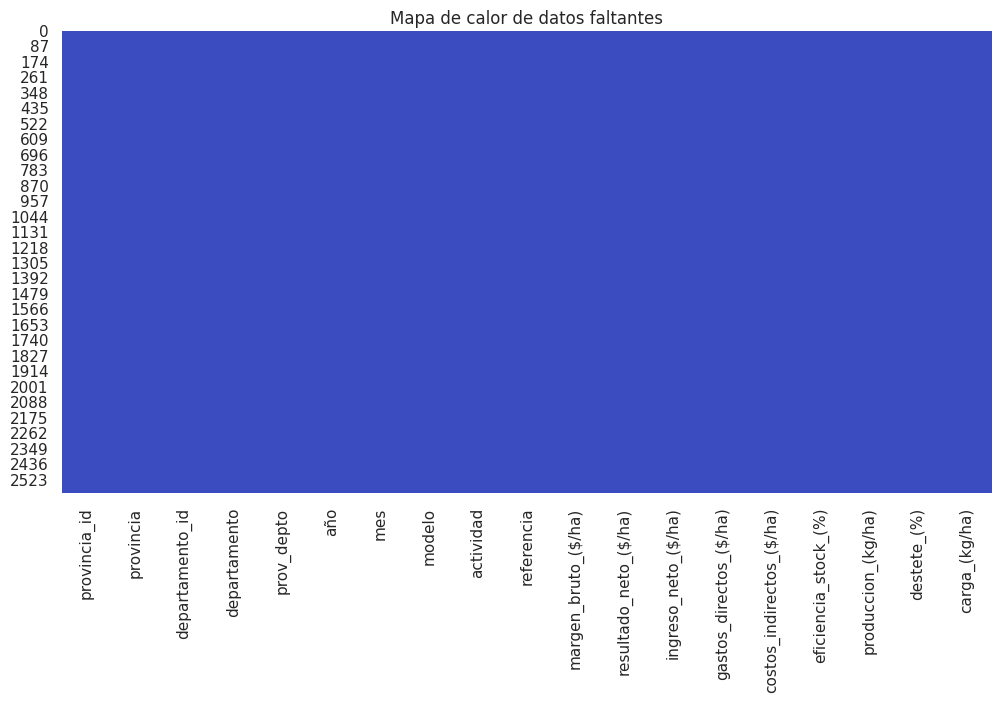

In [ ]:
# Verificar si hay valores nulos en la columna 'producción'
nulos_produccion= df['produccion_(kg/ha)'].isnull().any()
print(f"¿Hay valores nulos en la columna 'producción'? {nulos_produccion}")

# Visualizar datos faltantes
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='coolwarm')
plt.title('Mapa de calor de datos faltantes')
plt.show()

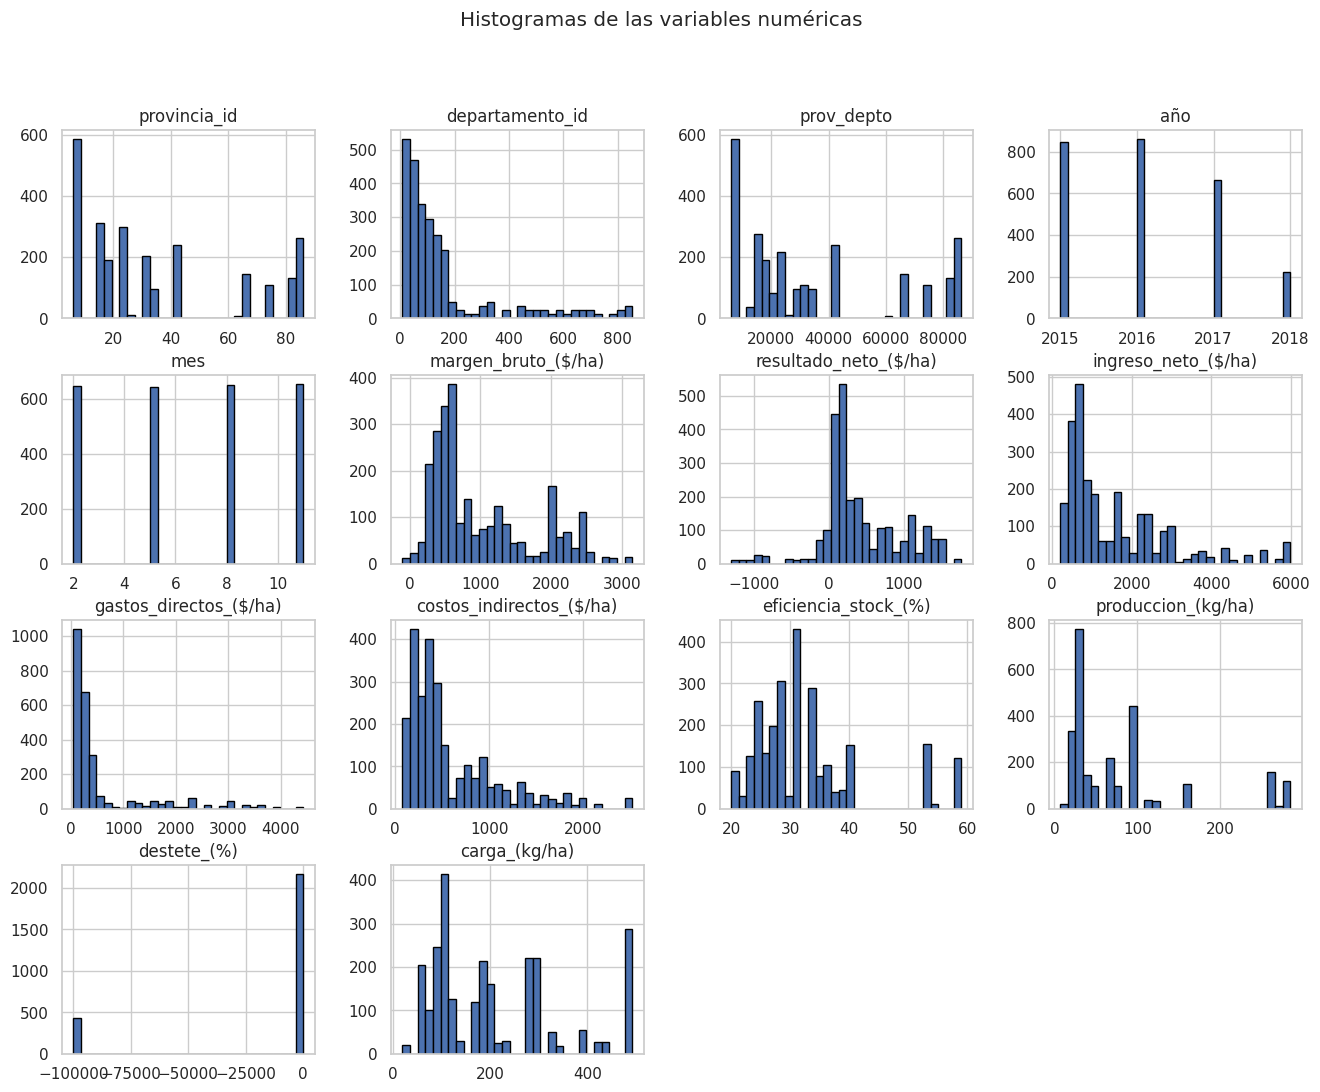

In [ ]:
# Histograma de las variables numéricas
df.hist(figsize=(16, 12), bins=30, edgecolor='black')
plt.suptitle('Histogramas de las variables numéricas')
plt.show()

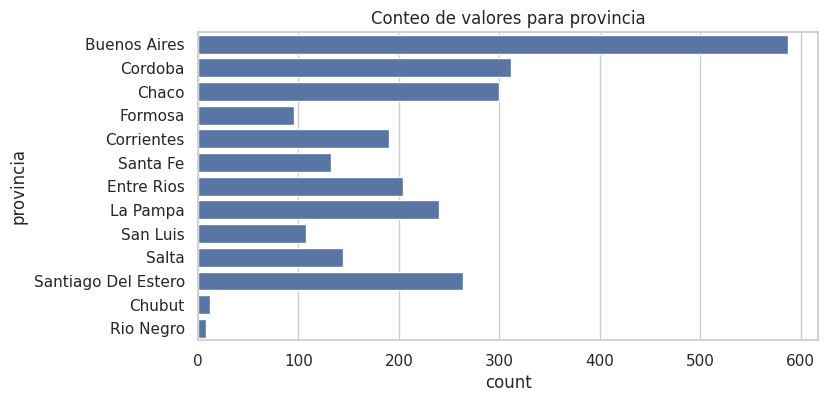

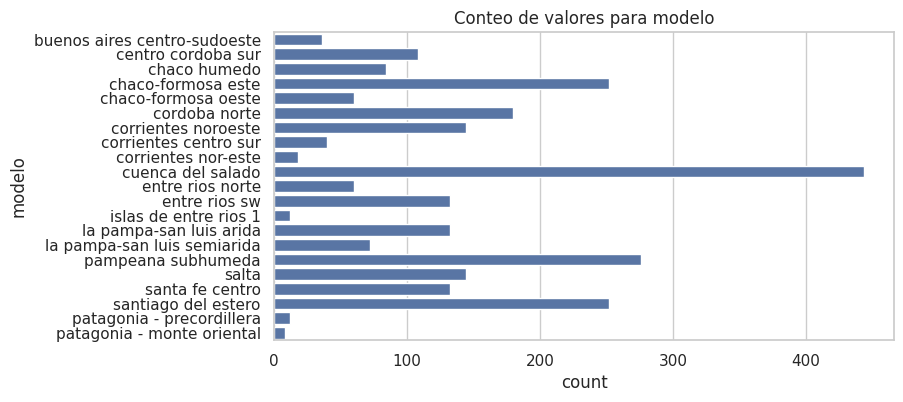

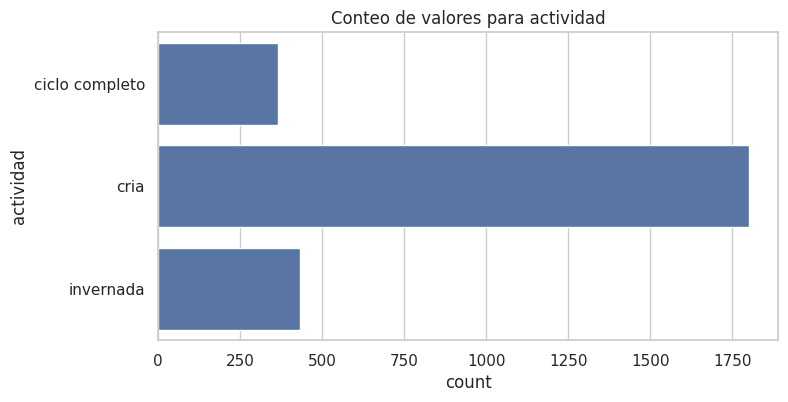

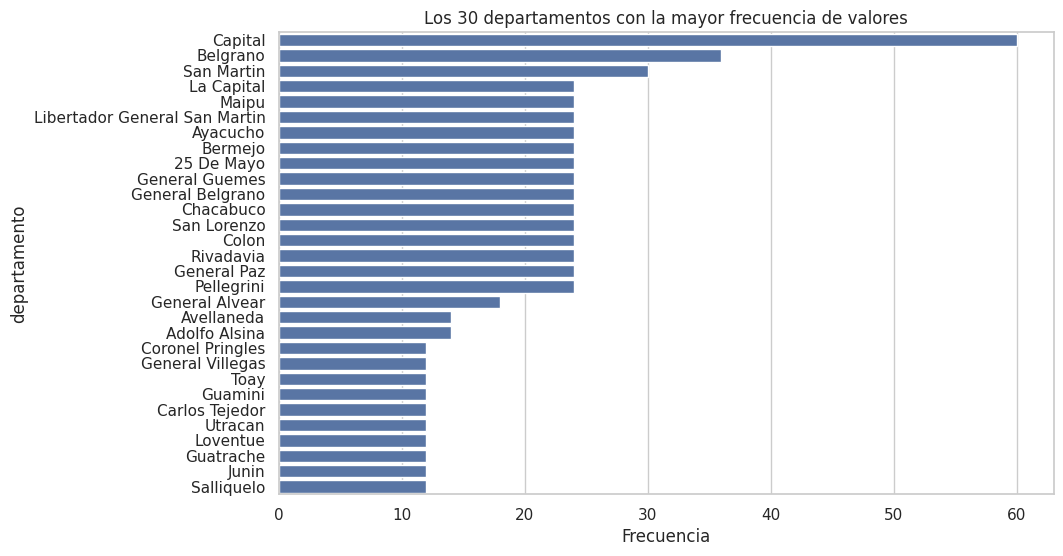

Número de valores diferentes en la columna 'departamento': 199


In [ ]:
# Conteo de valores de las variables categóricas
columnas_interes = ['provincia', 'modelo','actividad']
for col in columnas_interes:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=col, data=df)
    plt.title(f'Conteo de valores para {col}')
    plt.show()

# Conteo por departamentos, los 30 con mayores frecuencias
# Seleccionar la columna categórica de interés
columna_dpto = 'departamento'
top_n = 30
frecuencia = df[columna_dpto].value_counts().nlargest(top_n)

# Crear el gráfico de conteo solo para las categorías más frecuentes
plt.figure(figsize=(10, 6))
sns.countplot(y=columna_dpto, data=df, order=frecuencia.index)
plt.title(f'Los {top_n} {columna_dpto}s con la mayor frecuencia de valores')
plt.xlabel('Frecuencia')
plt.ylabel(columna_dpto)
plt.show()

# Contar los valores diferentes en la columna 'departamento'
num_valores_diferentes = df['departamento'].nunique()

print(f"Número de valores diferentes en la columna 'departamento': {num_valores_diferentes}")

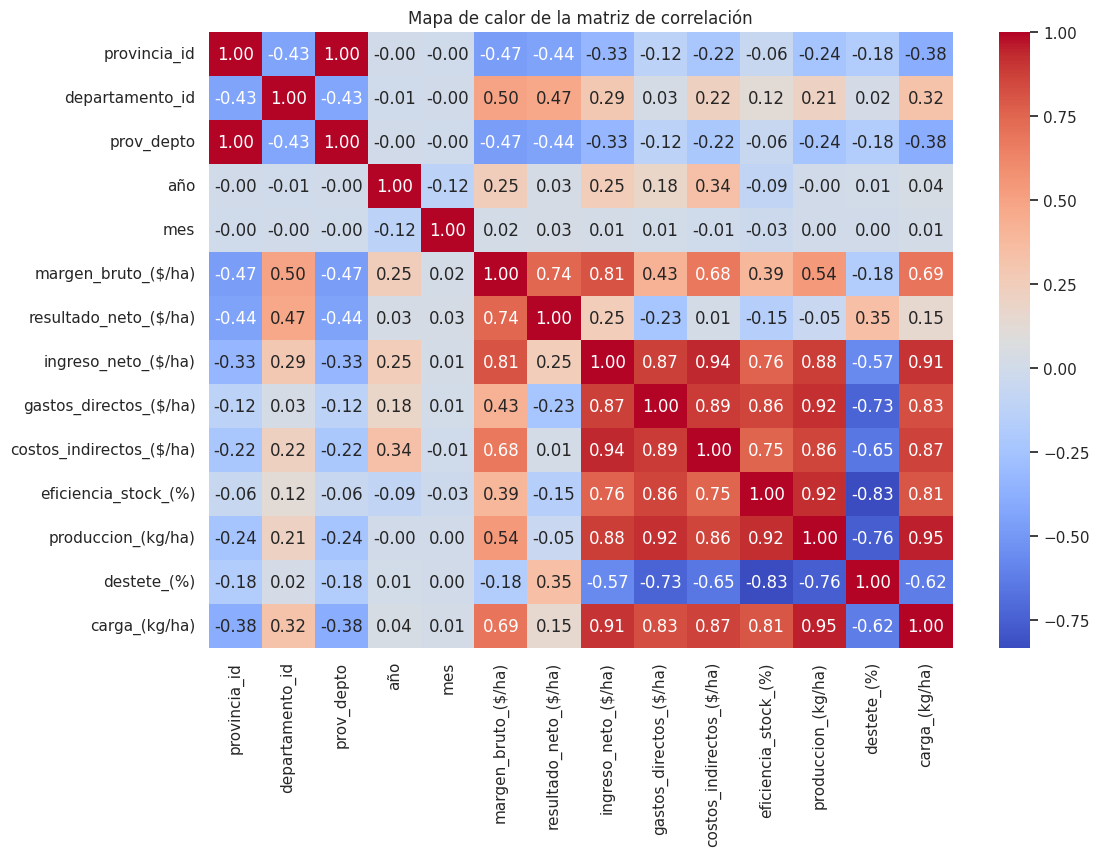

In [ ]:
# Matriz de correlación
numerical_df = df.select_dtypes(include=['float', 'int'])
correlation_matrix = numerical_df.corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de la matriz de correlación')
plt.show()

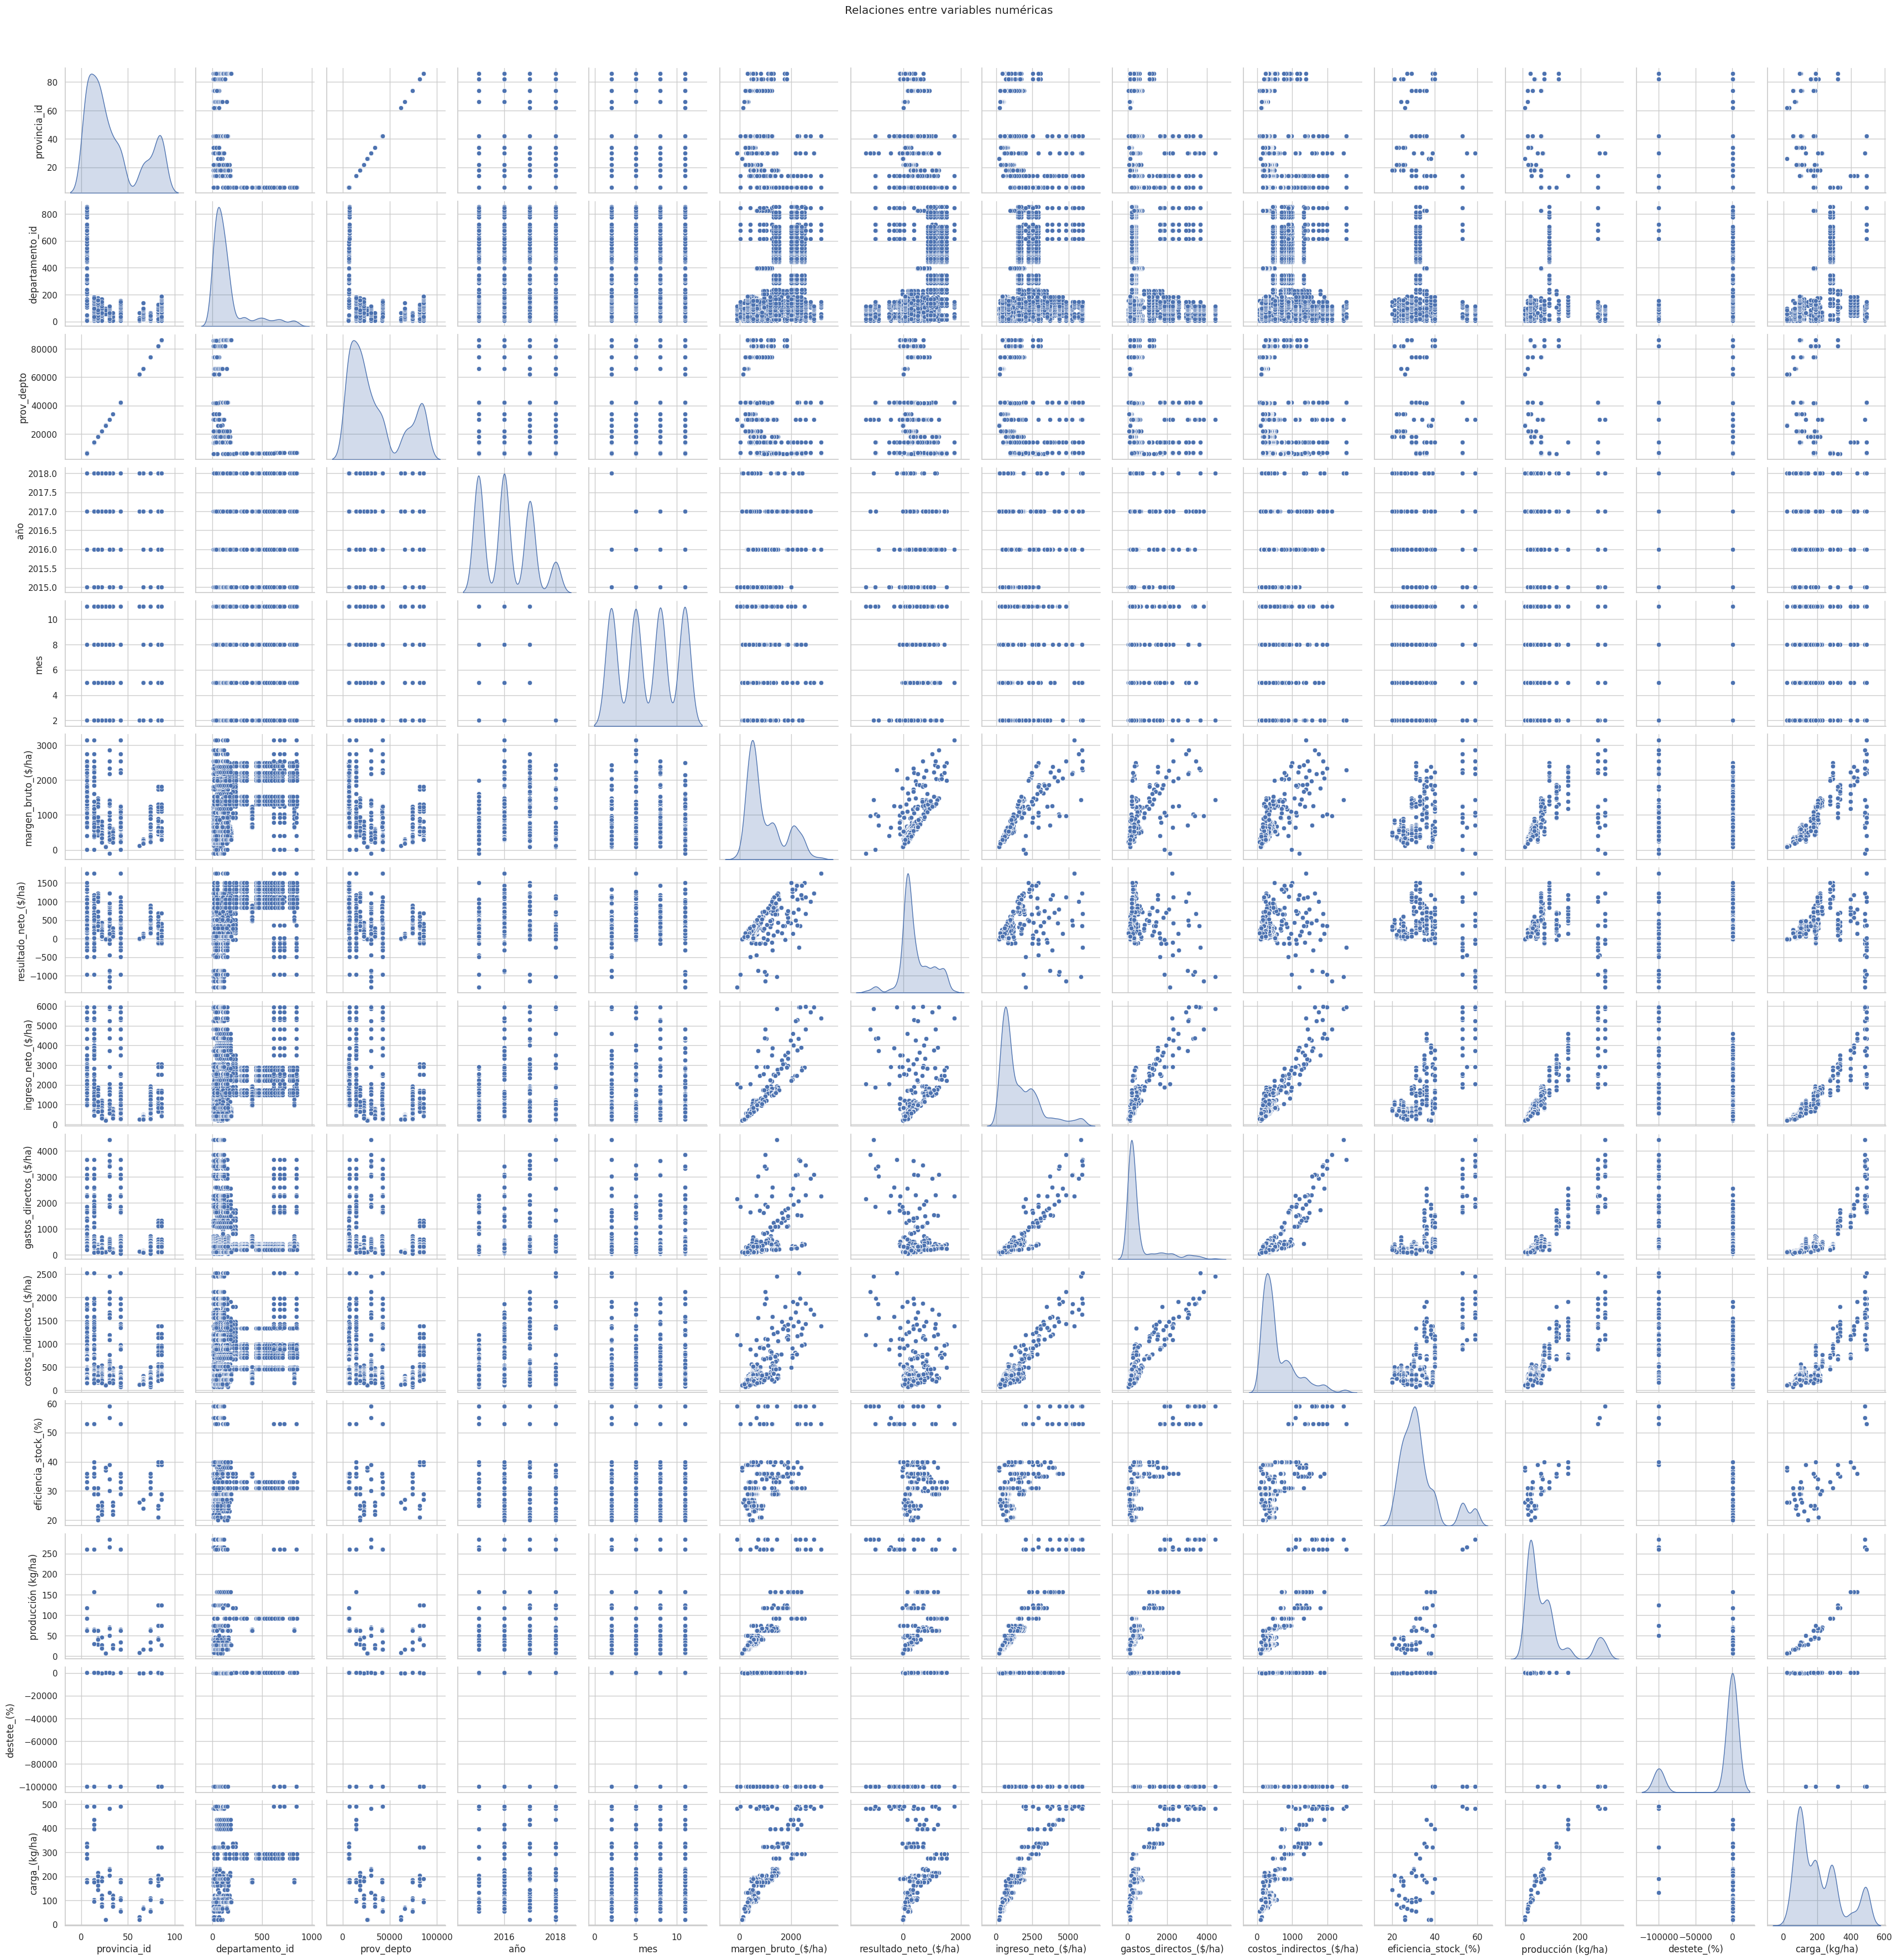

In [ ]:
# Pairplot para visualizar relaciones entre variables numéricas
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Relaciones entre variables numéricas', y=1.02)
plt.show()

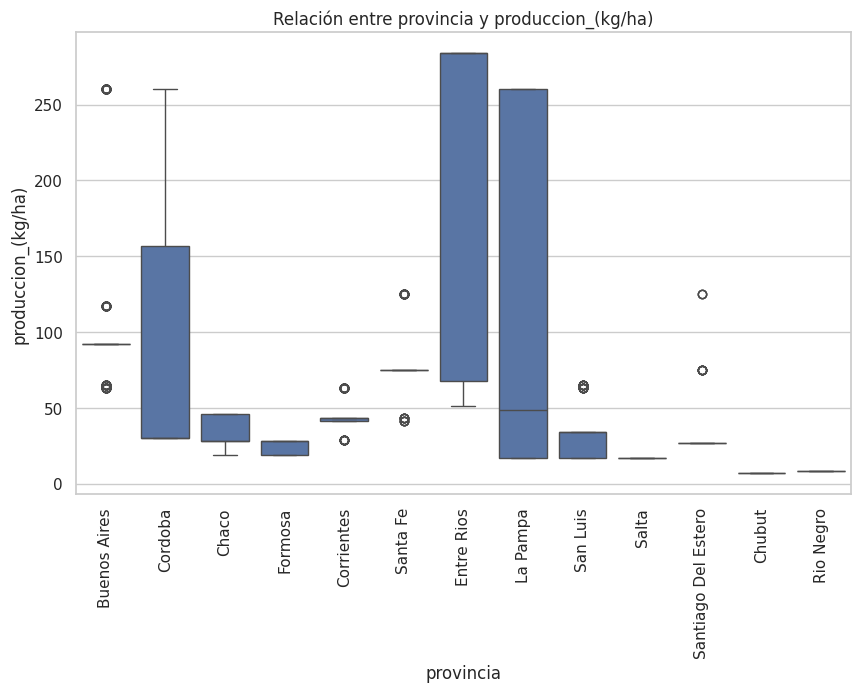

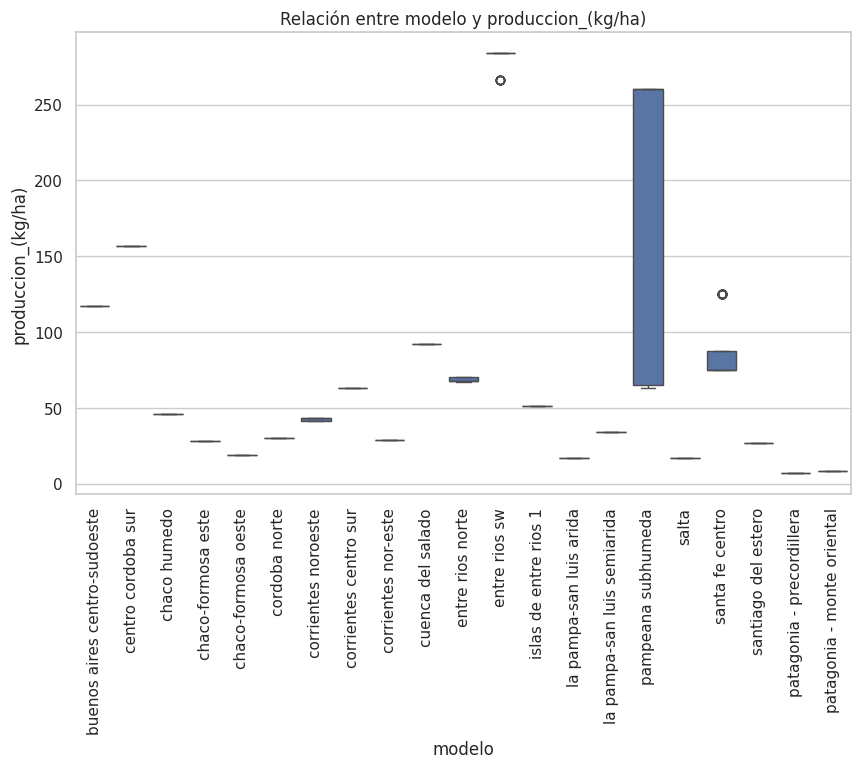

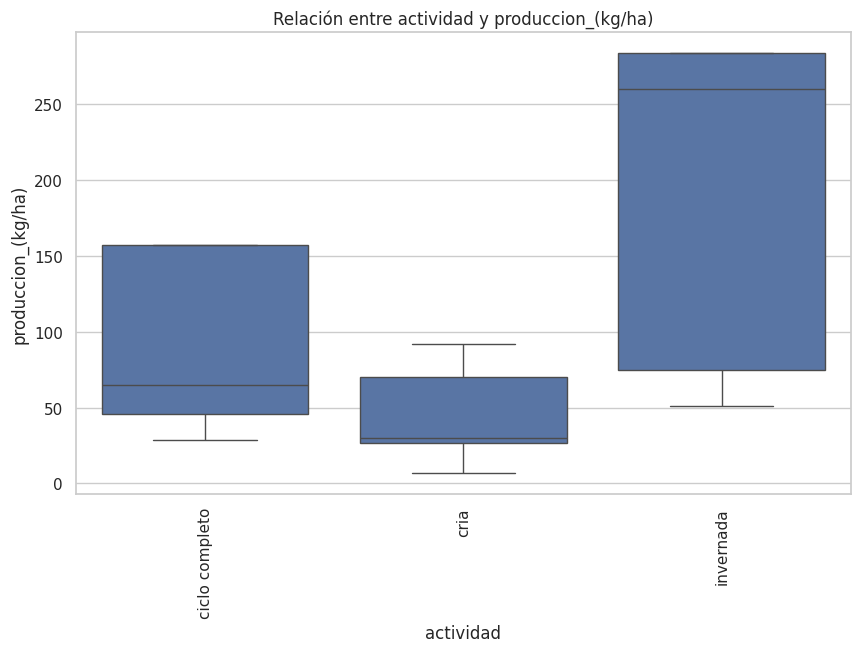

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


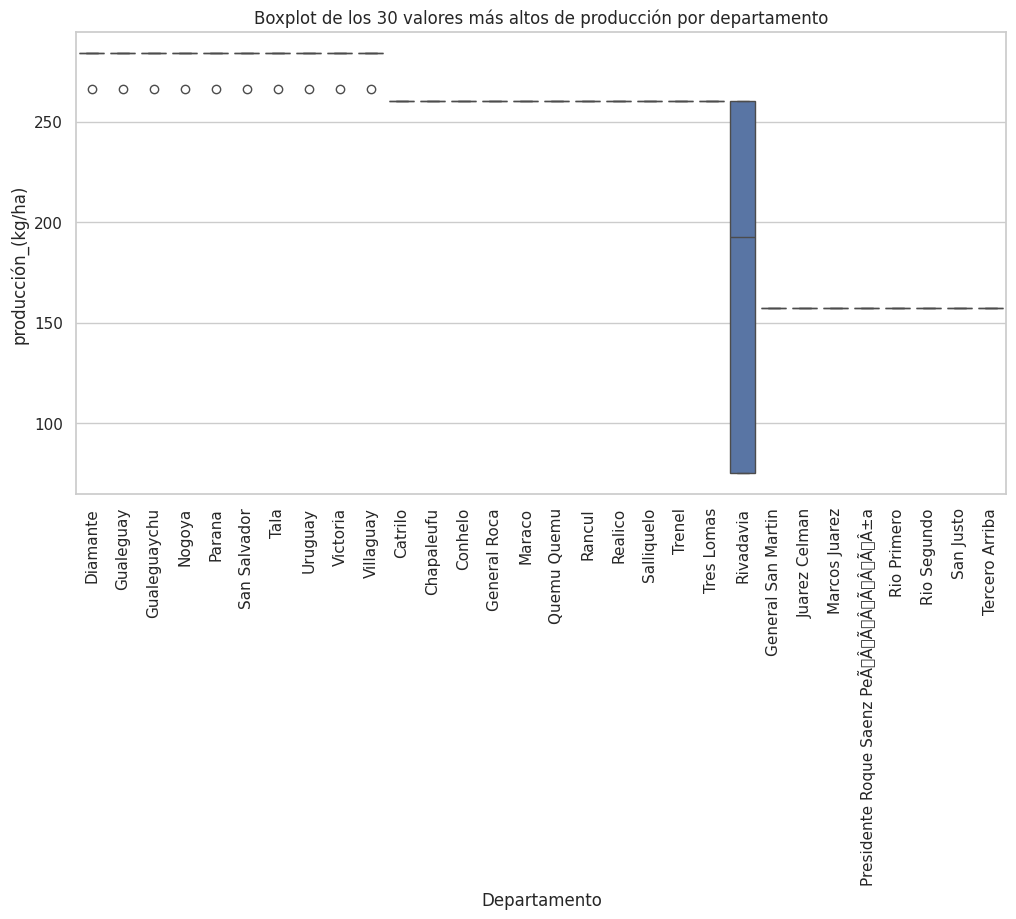

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


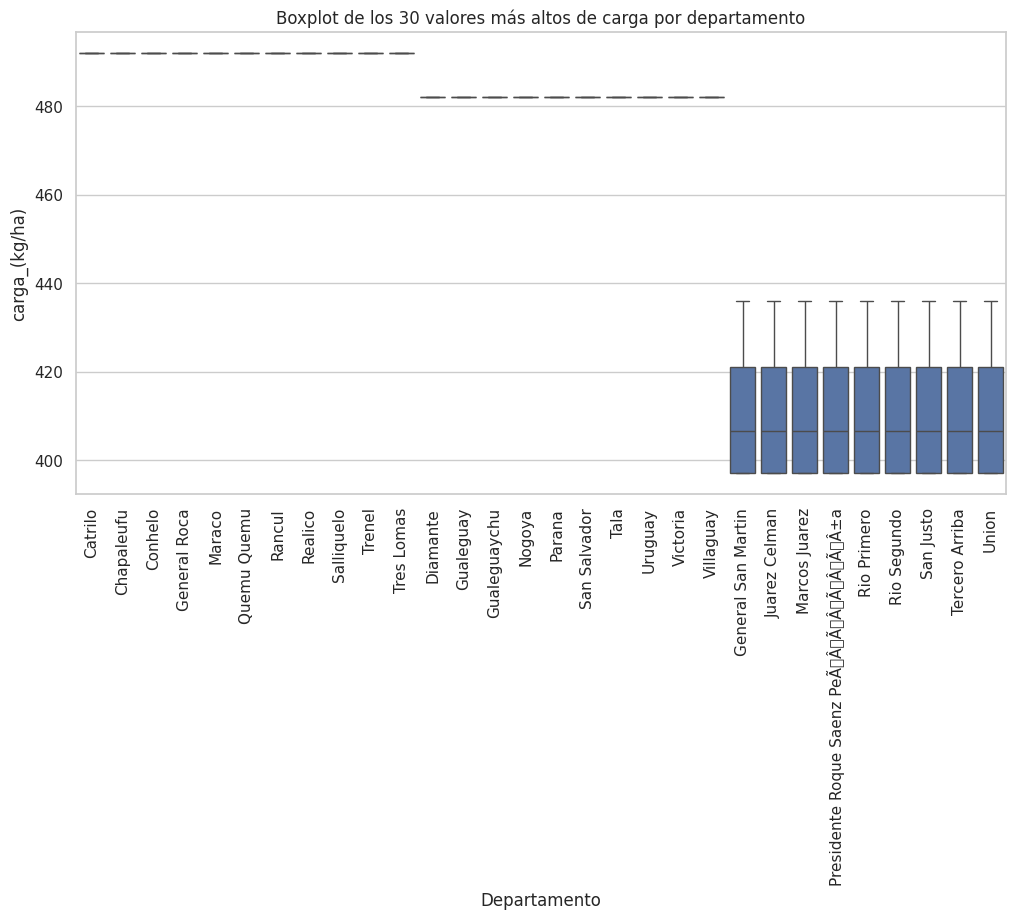

In [ ]:
# Boxplots para visualizar la relación entre variables categóricas y una variable numérica (suponiendo 'target' como variable objetivo)
target_variable = 'produccion_(kg/ha)'  # Reemplaza 'target' con el nombre de tu variable objetivo
columnas_interes = ['provincia', 'modelo','actividad']
for col in columnas_interes:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y=target_variable, data=df)
    plt.title(f'Relación entre {col} y {target_variable}')
    plt.xticks(rotation=90)
    plt.show()

# Producción de los principales 30 departamentos
# Seleccionar la columna categórica de interés
columna_dpto = 'departamento'
top_n = 30
top_categorias = df.groupby('departamento')['produccion_(kg/ha)'].mean().nlargest(top_n).index

# Filtrar el DataFrame para incluir solo las filas de estas categorías
df_top = df[df['departamento'].isin(top_categorias)]

# Crear el gráfico de conteo solo para las categorías más frecuentes
plt.figure(figsize=(12, 6))
sns.boxplot(x='departamento', y='produccion_(kg/ha)', data=df_top, order=top_categorias)
plt.title(f'Boxplot de los 30 valores más altos de producción por departamento')
plt.xlabel('Departamento')
plt.ylabel('producción_(kg/ha)')
plt.xticks(rotation=90)
plt.show()

# Carga de los principales 30 departamentos
# Seleccionar la columna categórica de interés
columna_dpto = 'departamento'
top_n = 30
top_categorias = df.groupby('departamento')['carga_(kg/ha)'].mean().nlargest(top_n).index

# Filtrar el DataFrame para incluir solo las filas de estas categorías
df_top = df[df['departamento'].isin(top_categorias)]

# Crear el gráfico de conteo solo para las categorías más frecuentes
plt.figure(figsize=(12, 6))
sns.boxplot(x='departamento', y='carga_(kg/ha)', data=df_top, order=top_categorias)
plt.title(f'Boxplot de los 30 valores más altos de carga por departamento')
plt.xlabel('Departamento')
plt.ylabel('carga_(kg/ha)')
plt.xticks(rotation=90)
plt.show()

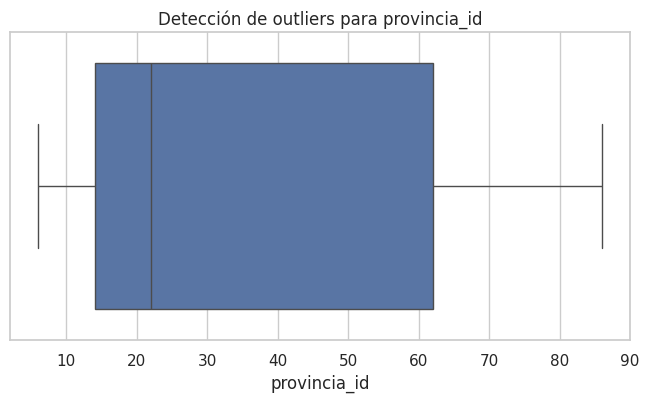

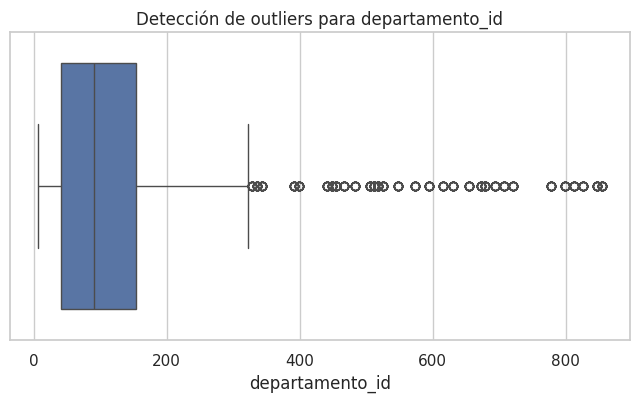

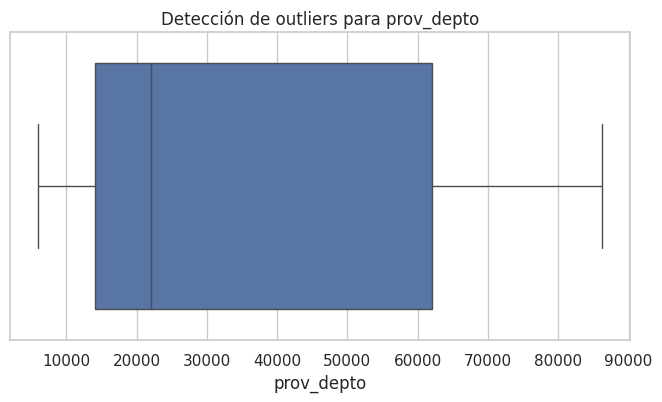

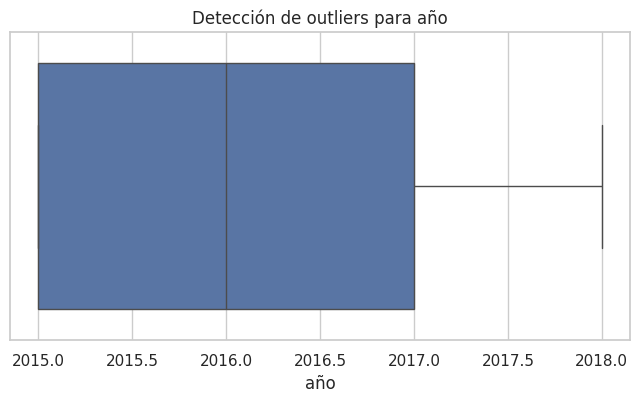

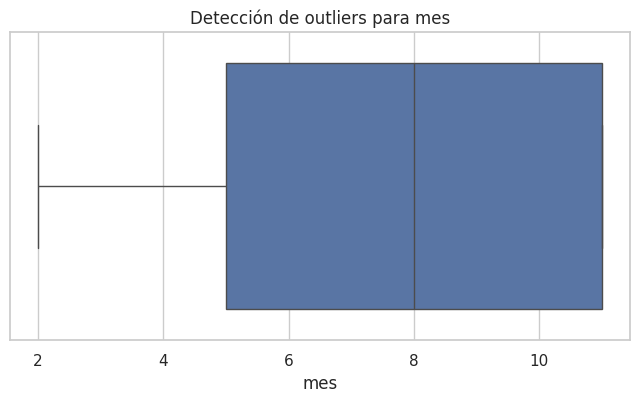

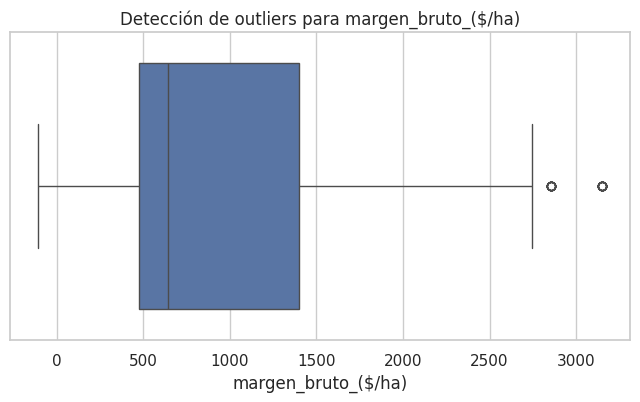

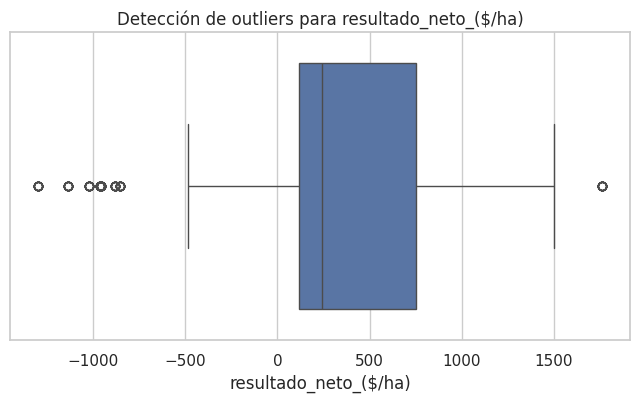

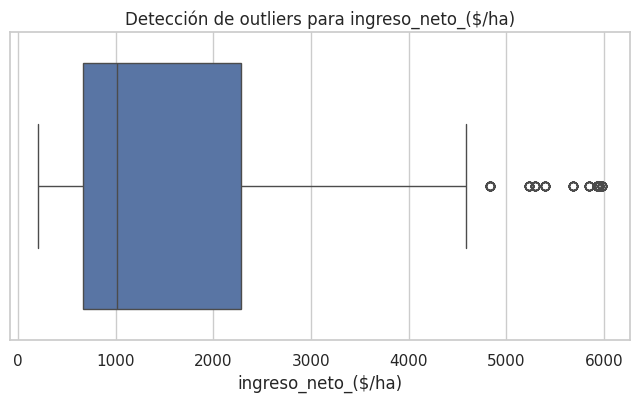

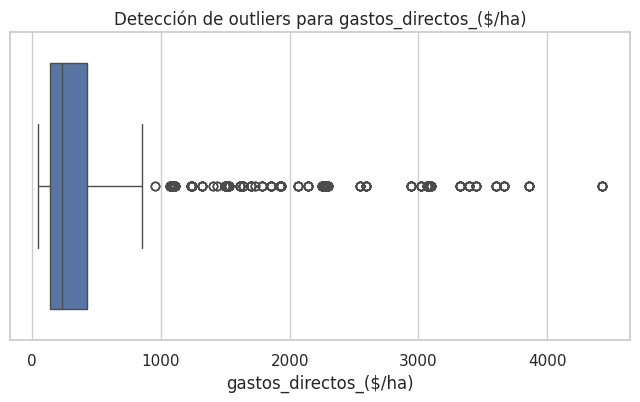

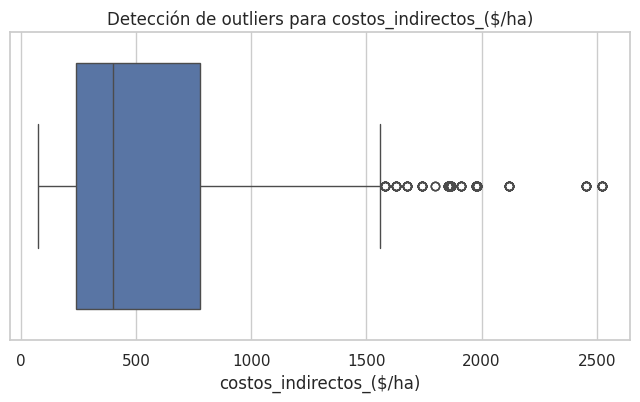

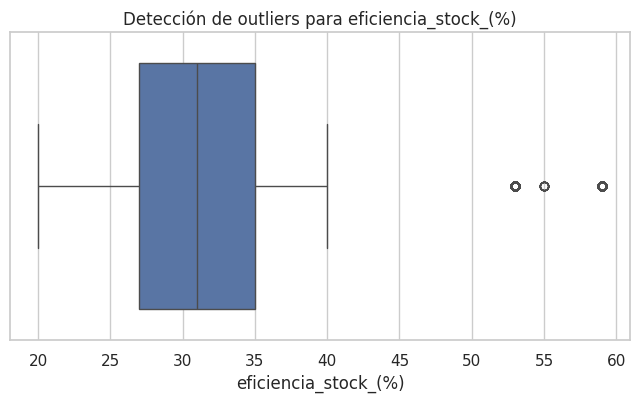

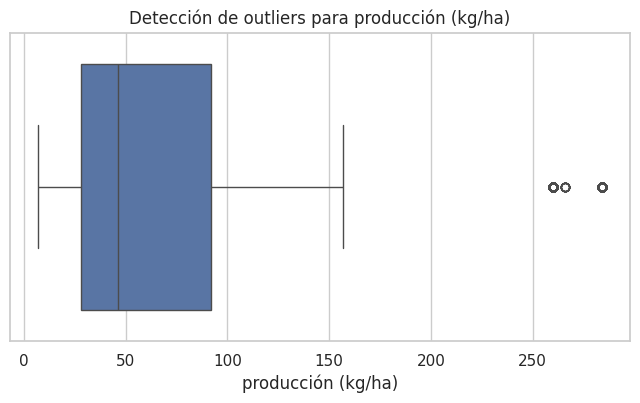

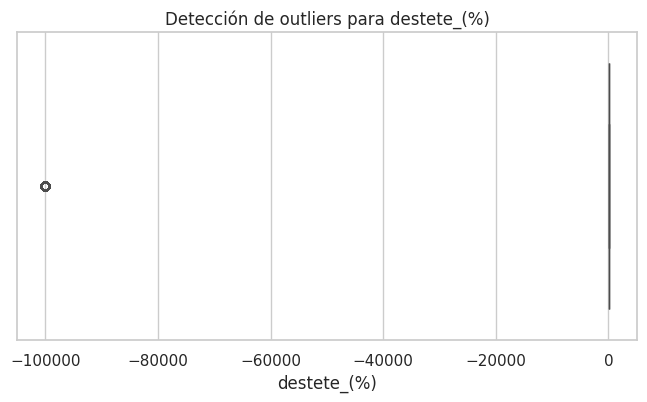

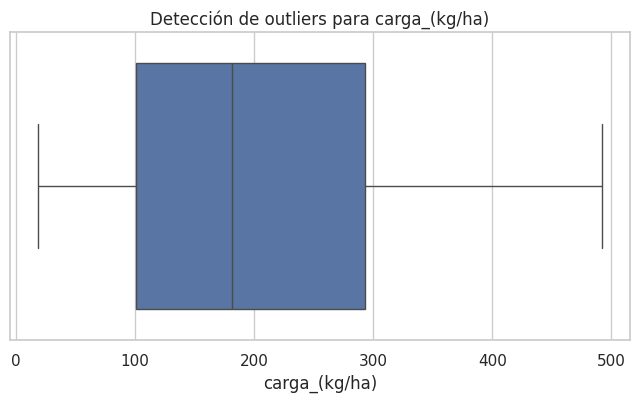

In [ ]:
# Boxplots para detectar outliers en variables numéricas
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Detección de outliers para {col}')
    plt.show()

## Interpretación del análisis exploratorio de los datos
<p align="justify">
El data frame se trata de la producción de carne bovina en la república Argentina. Los datos fueron recolectados desde el año 2015 al 2018. Se encuentran discriminados por departamentos provinciales. Las variables numéricas presentes en este data set son: margen bruto ($/ha), resultado neto (\$/ha), ingreso neto (\$/ha), gastos directos (\$/ha), costos indirectos (\$/ha), eficiencia stock (%), producción (kg/ha), destete (%) y carga (kg/ha). En todas estas variables el desvio estandar es muy alto, en algunos casos es muy similar al valor promedio o inclusive superior. El rango de valores es muy amplio, en algunos casos hay mínimos negativos y máximos positivos.
</p>
<p align="justify">
Al observar los histogramas de los datos, la distribución en la mayoría de los casos no se ajustaría a una distribución normal pero debería realizar test estadisticos para rechazar u afirmar esta aseveración.
</p>
<p align="justify">
El mapa de calor muestra una alta correlación entre la mayoría de las variables, aunque la mayor correlación (0,95) se observa entre la producción (kg/ha) y la carga (kg/ha). Es decir, que un aumento de producción estaría intimamente relacionado a un aumento de carga y viceversa (si vemos el gráfico de las dos variables, parece que es una correlación lineal. Sin embargo esto se debería corroborar con un análisis de correlación lineal). Hay que remarcar que los costos y los ingresos tienen una relación muy estrecha a la productividad.   
</p>

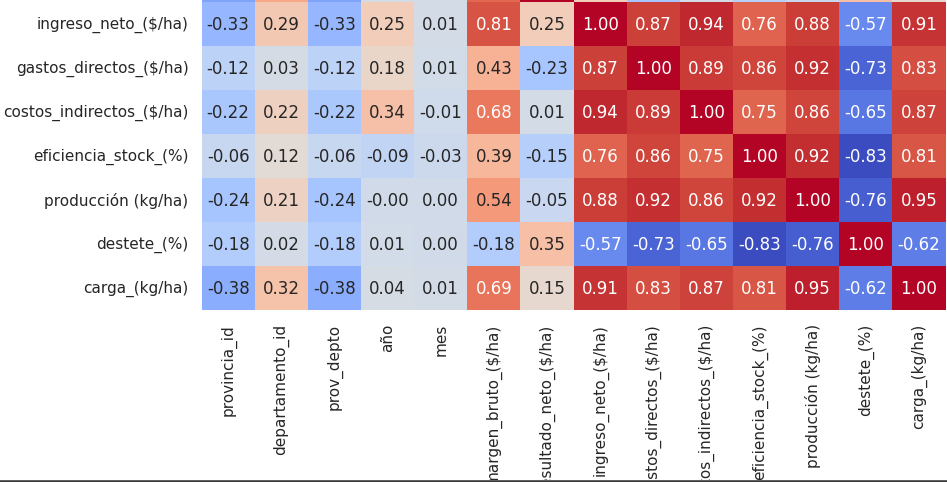




## Correlación lineal entre productividad y carga

R^2: 0.9090234841678031


Regresión Lineal entre **produccion_(kg/ha)** y **carga_(kg/ha)** (R^2 = **0.91**)

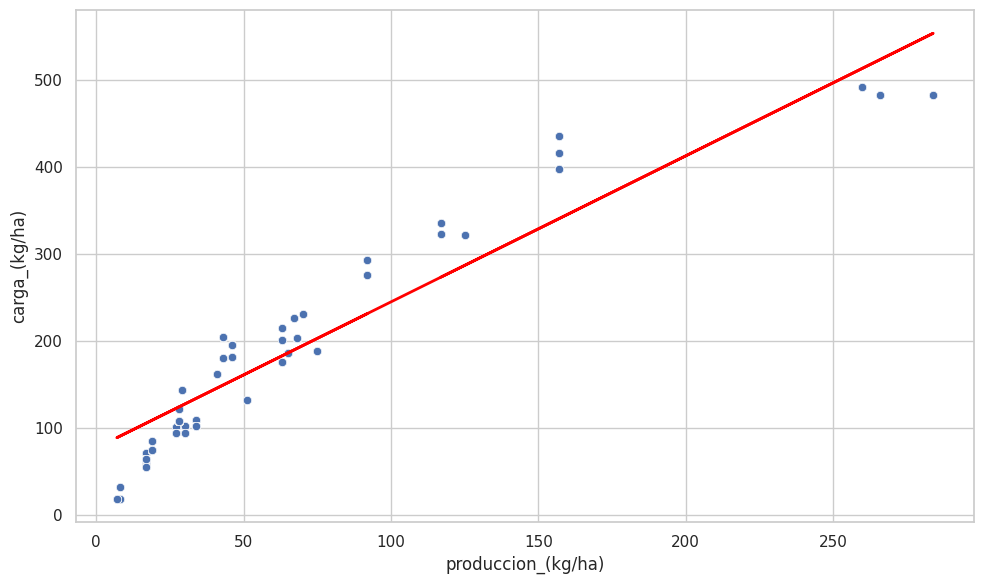

In [ ]:
# Calculo del coeficiente de correlación lineal entre las dos variables
# Seleccionar las dos variables
variable1 = 'produccion_(kg/ha)'
variable2 = 'carga_(kg/ha)'
# Preparar los datos
X = df[variable1].values.reshape(-1, 1)
y = df[variable2].values
# Crear el modelo de regresión lineal
model = LinearRegression()
# Ajustar el modelo
model.fit(X, y)
# Hacer predicciones
y_pred = model.predict(X)

# Calcular el coeficiente de determinación R^2
r2 = r2_score(y, y_pred)
print(f'R^2: {r2}')
texto = f'Regresión Lineal entre **{variable1}** y **{variable2}** (R^2 = **{r2:.2f}**)'
# Crear un diagrama de dispersión con la línea de regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=variable1, y=variable2, data=df)
plt.plot(df[variable1], y_pred, color='red', linewidth=2)
plt.title(display(Markdown(texto)))
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.tight_layout()
plt.show()

<p align="justify">
Al analizar el valor del r^2 se observa que es alto pero para que se pueda asegurar que la relación sea lineal debería estar por encima de un valor de  0,97.
</p>

## Grafico de productividad y carga por provincias

<ipython-input-58-772a08d0e3a7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='provincia', y='produccion_(kg/ha)', data=df, palette='rocket_r')


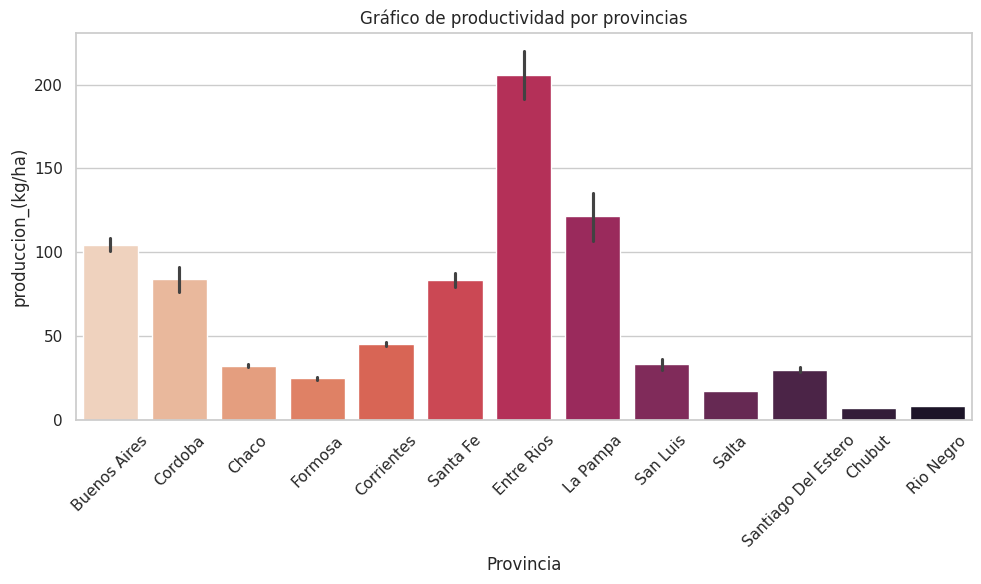

In [ ]:
# Crear el gráfico de barras para la productividad por provincias
plt.figure(figsize=(10, 6))
sns.barplot(x='provincia', y='produccion_(kg/ha)', data=df, palette='rocket_r')
plt.title('Gráfico de productividad por provincias')
plt.xlabel('Provincia')
plt.ylabel('produccion_(kg/ha)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-60-dc3a26d91b6b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='provincia', y='carga_(kg/ha)', data=df, palette='rocket_r')


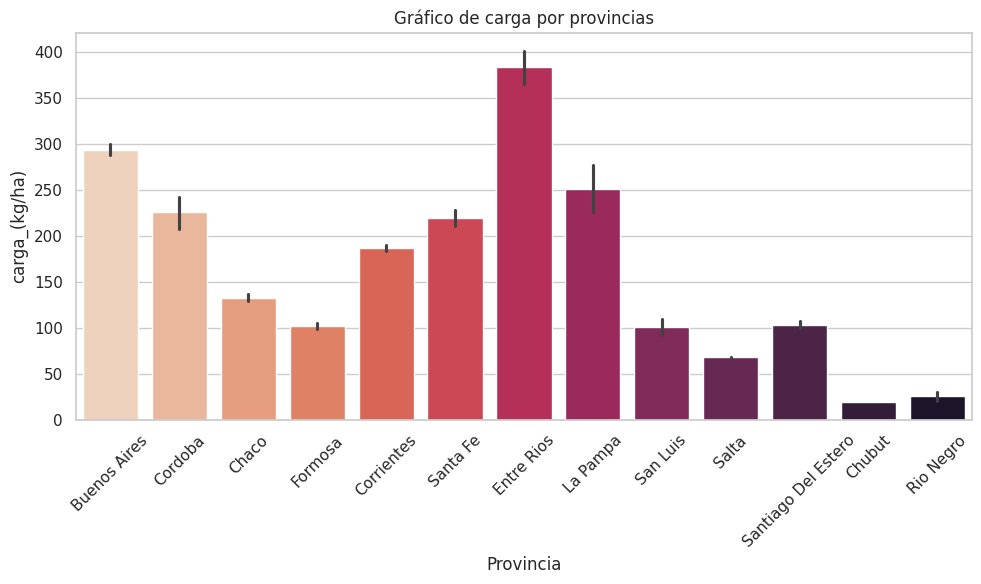

In [ ]:
# Crear el gráfico de barras para la carga por provincias
plt.figure(figsize=(10, 6))
sns.barplot(x='provincia', y='carga_(kg/ha)', data=df, palette='rocket_r')
plt.title('Gráfico de carga por provincias')
plt.xlabel('Provincia')
plt.ylabel('carga_(kg/ha)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Gráficos de productividad y carga por modelos

<ipython-input-62-05436c88bea2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='modelo', y='produccion_(kg/ha)', data=df, palette='rocket_r')


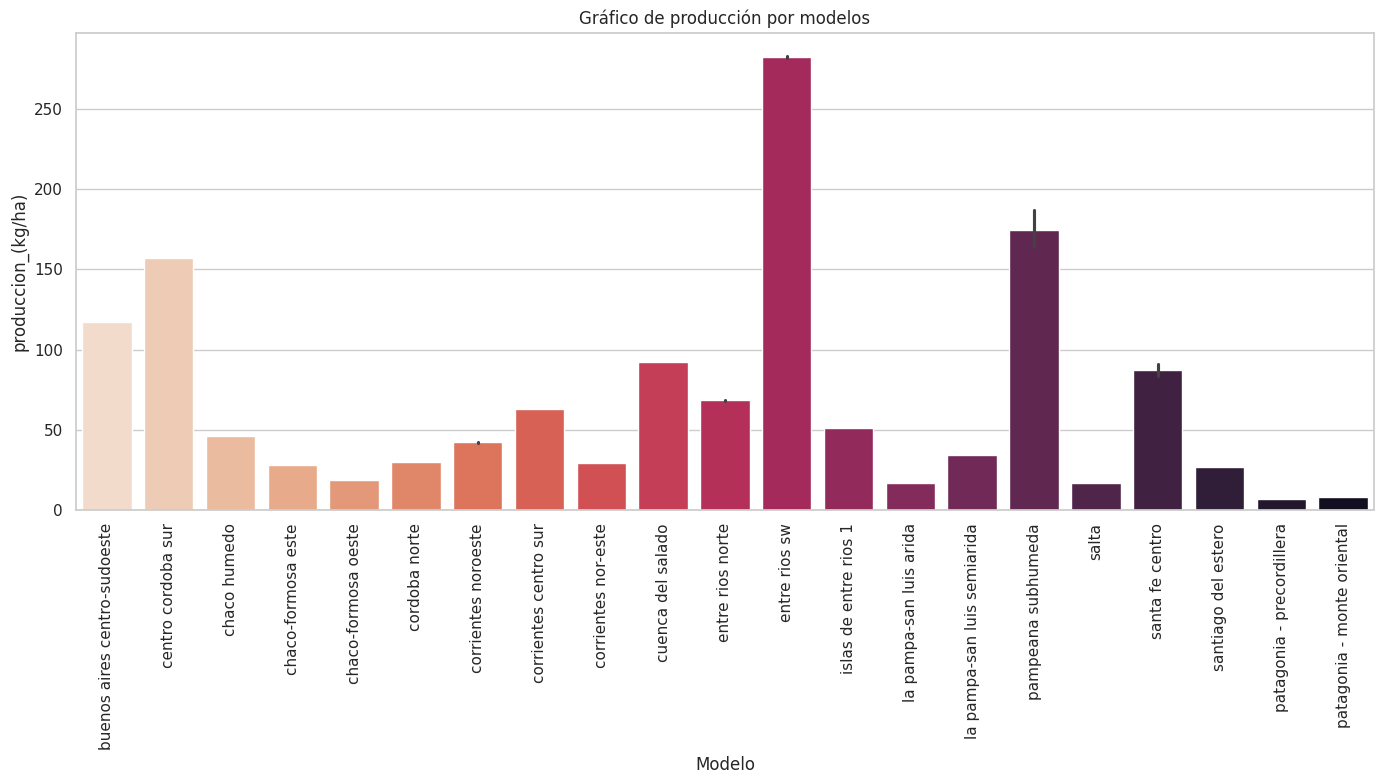

In [ ]:
#Crear el gráfico de barras para la productividad por modelos
plt.figure(figsize=(14, 8))
sns.barplot(x='modelo', y='produccion_(kg/ha)', data=df, palette='rocket_r')
plt.title('Gráfico de producción por modelos')
plt.xlabel('Modelo')
plt.ylabel('produccion_(kg/ha)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<ipython-input-63-20aca206e774>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='modelo', y='carga_(kg/ha)', data=df, palette='rocket_r')


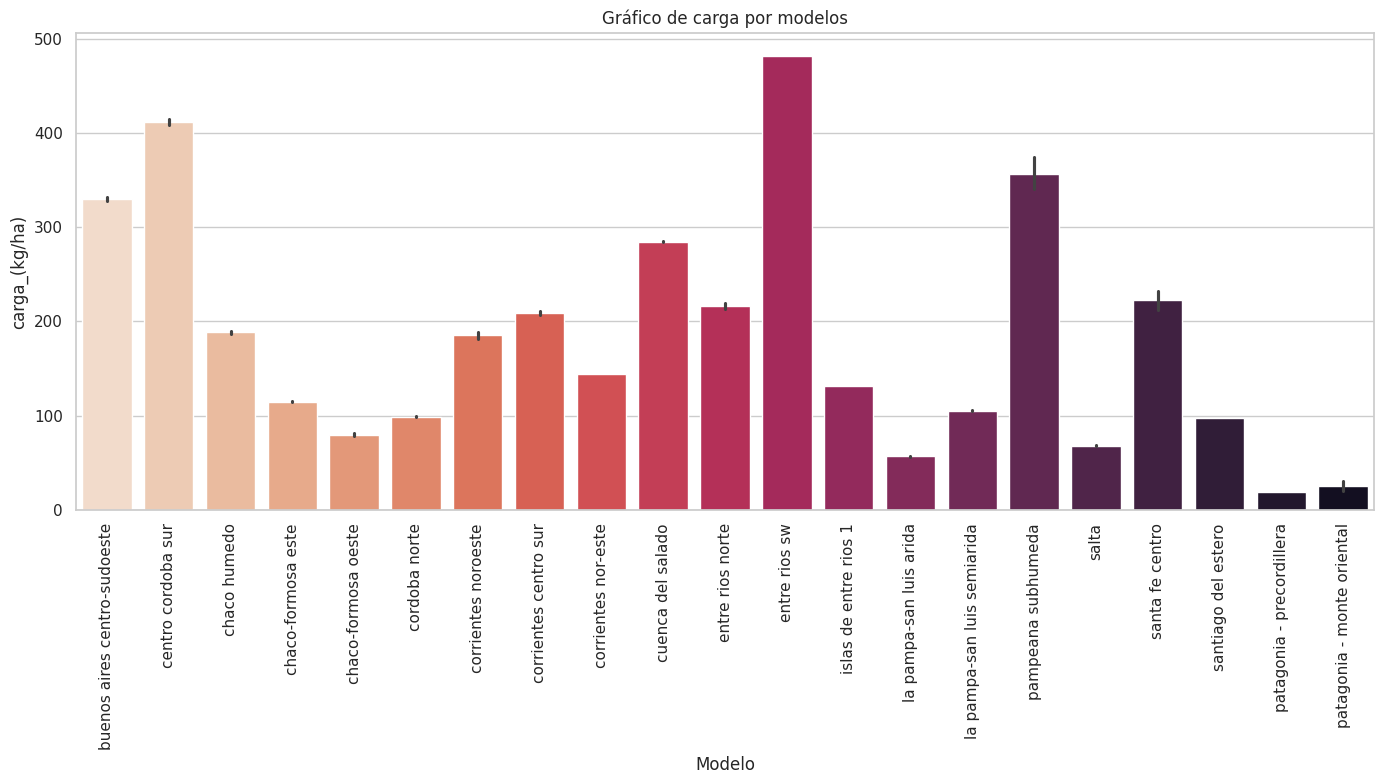

In [ ]:
# Crear el gráfico de barras para la carga por modelos
plt.figure(figsize=(14, 8))
sns.barplot(x='modelo', y='carga_(kg/ha)', data=df, palette='rocket_r')
plt.title('Gráfico de carga por modelos')
plt.xlabel('Modelo')
plt.ylabel('carga_(kg/ha)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Gráfico de productividad, ingresos netos y carga por actividad

<ipython-input-66-19e0e49c7a73>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='actividad', y='produccion_(kg/ha)', data=df, palette='rocket_r')


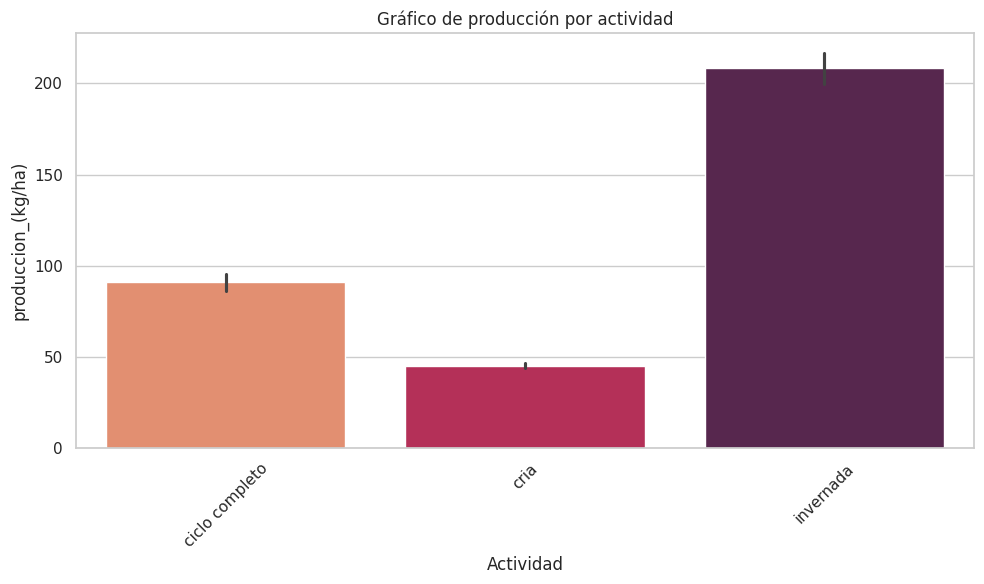

In [ ]:
#Crear el gráfico de barras para la productividad por actividad
plt.figure(figsize=(10, 6))
sns.barplot(x='actividad', y='produccion_(kg/ha)', data=df, palette='rocket_r')
plt.title('Gráfico de producción por actividad')
plt.xlabel('Actividad')
plt.ylabel('produccion_(kg/ha)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-67-336903445245>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='actividad', y='ingreso_neto_($/ha)', data=df, palette='rocket_r')


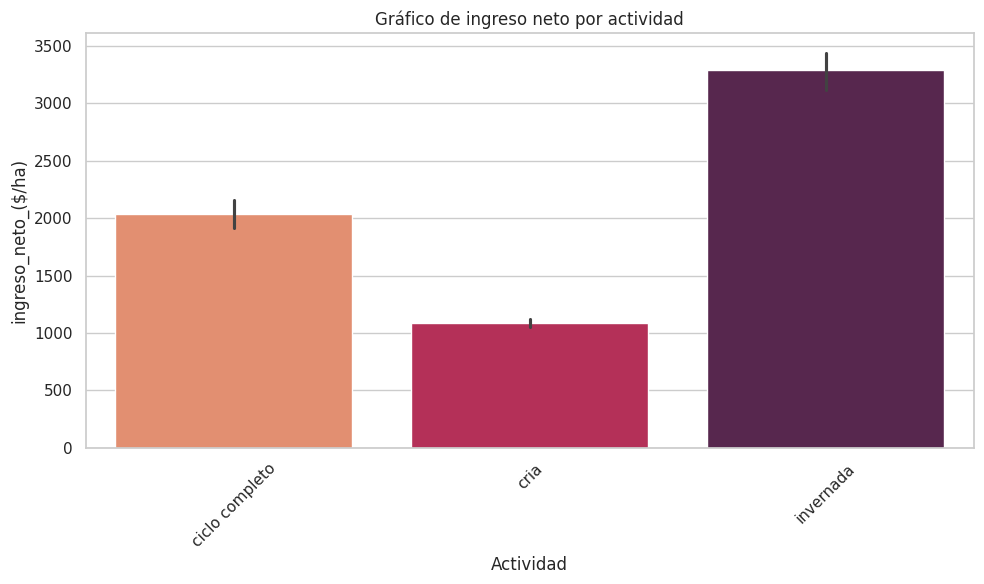

In [ ]:
#Crear el gráfico de barras de ingresos netos por actividad
plt.figure(figsize=(10, 6))
sns.barplot(x='actividad', y='ingreso_neto_($/ha)', data=df, palette='rocket_r')
plt.title('Gráfico de ingreso neto por actividad')
plt.xlabel('Actividad')
plt.ylabel('ingreso_neto_($/ha)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-69-c81053e0efc6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='actividad', y='carga_(kg/ha)', data=df, palette='rocket_r')


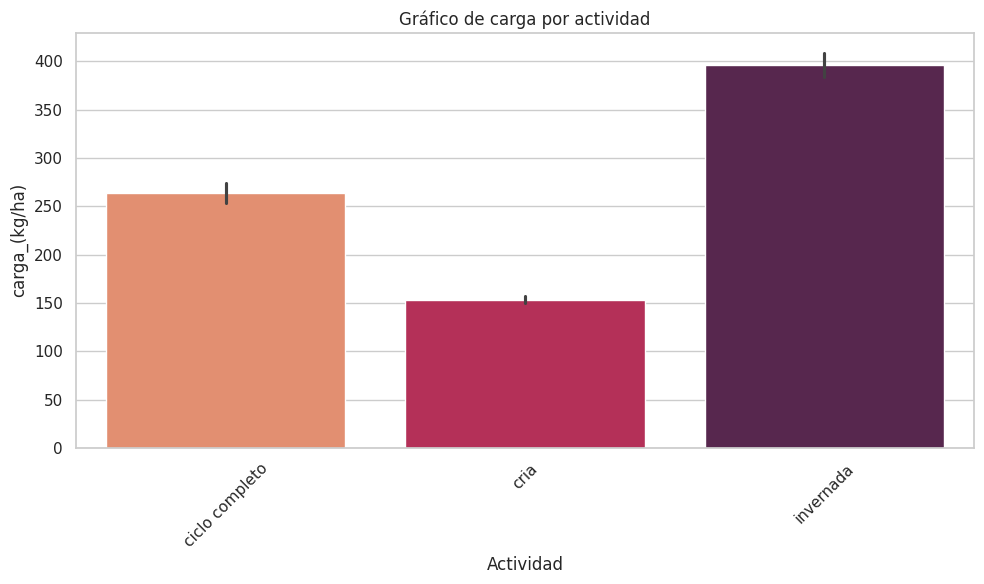

In [ ]:
# Crear el gráfico de barras para la carga por actividad
plt.figure(figsize=(10, 6))
sns.barplot(x='actividad', y='carga_(kg/ha)', data=df, palette='rocket_r')
plt.title('Gráfico de carga por actividad')
plt.xlabel('Actividad')
plt.ylabel('carga_(kg/ha)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Mapa de calor de productividad por departamentos provinciales


In [ ]:
# Cargar el shapefile
gdf_crudo = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/gadm41_ARG_shp/gadm41_ARG_2.shp')
print(gdf_crudo.columns)
gdf_crudo.head()
gdf = gdf_crudo.rename(columns={'NAME_2': 'departamento'})
gdf.head()
# Unir los datos del DataFrame con el GeoDataFrame
merged = gdf.set_index('departamento').join(df.set_index('departamento'))
# Crear el mapa base
m = folium.Map(location=[-38.4161, -63.6167], zoom_start=5)

# Convertir datos a formato de lista, manejando NaNs
heat_data = [[row['geometry'].centroid.y, row['geometry'].centroid.x, row['produccion_(kg/ha)']]
             for idx, row in merged.iterrows() if pd.notna(row['produccion_(kg/ha)'])]
             # Filtramos las filas con NaN en 'produccion_(kg/ha)'

# Agregar capa de HeatMap
folium.plugins.HeatMap(heat_data).add_to(m)


# Guardar el mapa en un archivo HTML
m.save('heatmap_argentina.html')

from IPython.display import IFrame

# Mostrar el archivo HTML en el notebook
IFrame('heatmap_argentina.html', width=500, height=400)

# Mostrar el mapa directamente en el notebook
m



Index(['GID_2', 'GID_0', 'COUNTRY', 'GID_1', 'NAME_1', 'NL_NAME_1', 'NAME_2',
       'VARNAME_2', 'NL_NAME_2', 'TYPE_2', 'ENGTYPE_2', 'CC_2', 'HASC_2',
       'geometry'],
      dtype='object')


## Determinación de las variables con mayor influencia sobre los ingresos netos por hectárea utilizando machine learning

Mean Squared Error: 292.0184082692307
R^2 Score: 0.9998321330405049
Optimized Random Forest - Mean Squared Error: 282.78724456374084
Optimized Random Forest - R^2 Score: 0.9998374395805721


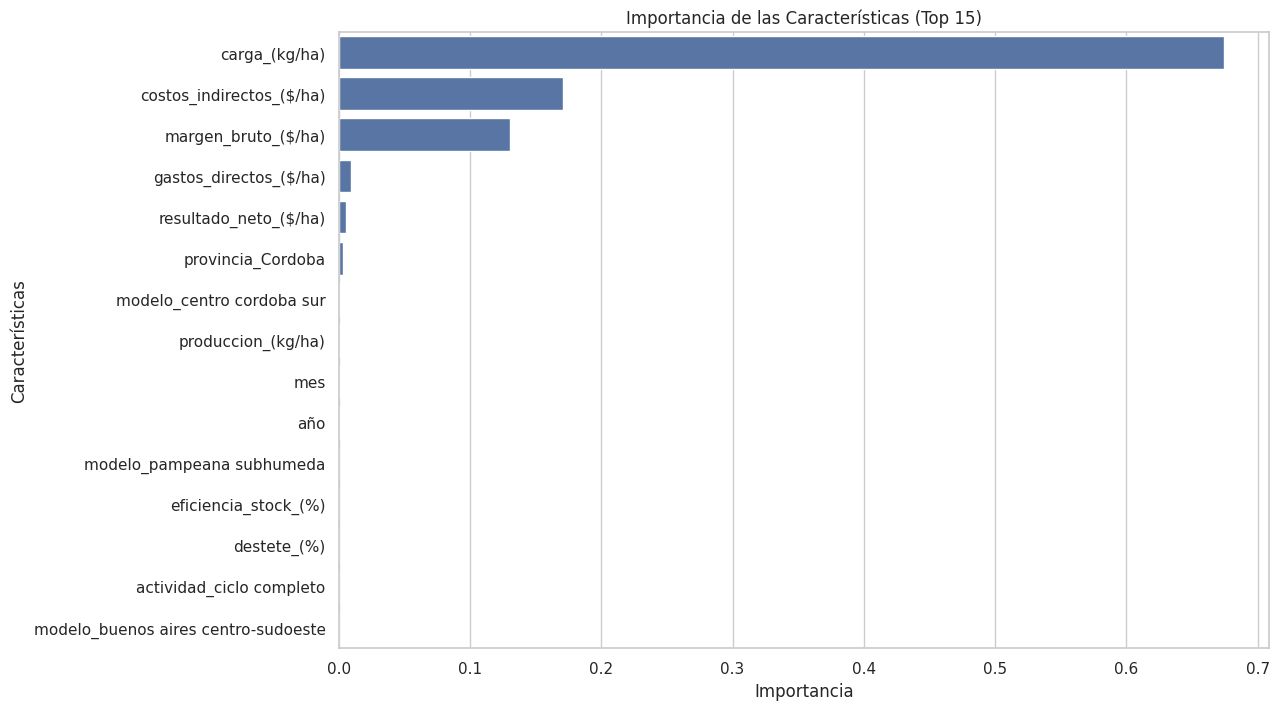

In [ ]:
# Separar características y la variable objetivo
X = df.drop('ingreso_neto_($/ha)', axis=1)
y = df['ingreso_neto_($/ha)']

# Identificar columnas numéricas y categóricas
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Crear pipelines de preprocesamiento para datos numéricos y categóricos
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar preprocesadores en una columna
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Crear el modelo de pipeline con el preprocesador y el modelo de Random Forest
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Optimización de Hiperparámetros para Random Forest
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
print(f"Optimized Random Forest - Mean Squared Error: {mse_best}")
print(f"Optimized Random Forest - R^2 Score: {r2_best}")

# Importancia de las Características
importances = best_model.named_steps['regressor'].feature_importances_
feature_names = numerical_cols.tolist() + list(best_model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols))
importance_df = pd.DataFrame({'Características': feature_names, 'Importancia': importances})
importance_df = importance_df.sort_values(by='Importancia', ascending=False)

# Visualización de la importancia de las características
importance_df = importance_df.sort_values(by='Importancia', ascending=False)

# Mostrar solo las 15 características más importantes
top_n = 15
importance_top_n = importance_df.head(top_n)

# Visualización de la importancia de las características
plt.figure(figsize=(12, 8))
sns.barplot(x='Importancia', y='Características', data=importance_top_n)
plt.title('Importancia de las Características (Top 15)')
plt.show()

In [ ]:
importance_df.head(10)

Características  Importancia
12               carga_(kg/ha)     0.674707
8     costos_indirectos_($/ha)     0.170911
5          margen_bruto_($/ha)     0.130218
7       gastos_directos_($/ha)     0.009418
6        resultado_neto_($/ha)     0.005617
16           provincia_Cordoba     0.003467
226  modelo_centro cordoba sur     0.001325
10          produccion_(kg/ha)     0.001308
4                          mes     0.000969
3                          año     0.000823

In [ ]:
# Verificar si hay sobre ajuste
# Predicciones en el conjunto de entrenamiento
y_train_pred = best_model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print(f"R^2 Score en el conjunto de entrenamiento: {r2_train}")

# Predicciones en el conjunto de prueba
y_test_pred = best_model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print(f"R^2 Score en el conjunto de prueba: {r2_test}")

# Validación cruzada
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
print(f'Cross-Validation R^2 Scores: {scores}')
print(f'Mean Cross-Validation R^2: {scores.mean()}')

R^2 Score en el conjunto de entrenamiento: 0.9999771662839795
R^2 Score en el conjunto de prueba: 0.9998073527018103
Cross-Validation R^2 Scores: [0.95354727 0.98562651 0.98419079 0.90571656 0.9573691 ]
Mean Cross-Validation R^2: 0.9572900463542895


## Predicción de los ingresos netos por hectárea mediante la carga de kg por hectárea.

La variable más influyente es: carga_(kg/ha)
R^2 Score en el conjunto de entrenamiento: 0.8281850689651422
R^2 Score en el conjunto de prueba: 0.8123640803664789
Mean Squared Error en el conjunto de entrenamiento: 313260.89752508025
Mean Squared Error en el conjunto de prueba: 326408.1433911851


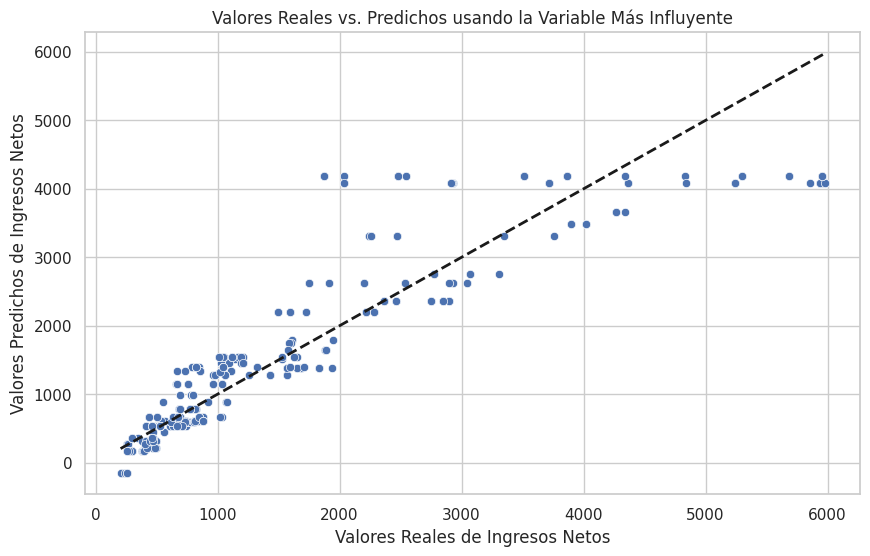

In [ ]:
# Extraer la caracteristica mas importante
top_feature = importance_df.iloc[0]['Características']
print(f'La variable más influyente es: {top_feature}')

#Seleccionar solo la variable más influyente
X_top_feature = df[[top_feature]]
y = df['ingreso_neto_($/ha)']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_top_feature, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'R^2 Score en el conjunto de entrenamiento: {train_r2}')
print(f'R^2 Score en el conjunto de prueba: {test_r2}')
print(f'Mean Squared Error en el conjunto de entrenamiento: {train_mse}')
print(f'Mean Squared Error en el conjunto de prueba: {test_mse}')

# Gráfico de dispersión de los valores predichos frente a los valores reales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel('Valores Reales de Ingresos Netos')
plt.ylabel('Valores Predichos de Ingresos Netos')
plt.title('Valores Reales vs. Predichos usando la Variable Más Influyente')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

##Predicción de los ingresos netos por hectárea mediante la carga de kg por hectárea, costos indirectos y margen bruto por hectárea.

Las tres variables más influyentes son: ['carga_(kg/ha)', 'costos_indirectos_($/ha)', 'margen_bruto_($/ha)']
R^2 Score en el conjunto de entrenamiento: 0.9555787296840685
R^2 Score en el conjunto de prueba: 0.95224970242494
Mean Squared Error en el conjunto de entrenamiento: 80990.90646289483
Mean Squared Error en el conjunto de prueba: 83065.57725351164
Intercepto: 1584.720345585699
Coeficientes: [362.97998162 699.20242927 364.52465606]
Variables: ['carga_(kg/ha)', 'costos_indirectos_($/ha)', 'margen_bruto_($/ha)']
Fórmula de la Regresión Lineal:
Ingresos Netos = 1584.720345585699 + (362.9799816207857 * carga_(kg/ha)) + (699.2024292743457 * costos_indirectos_($/ha)) + (364.52465605827854 * margen_bruto_($/ha))


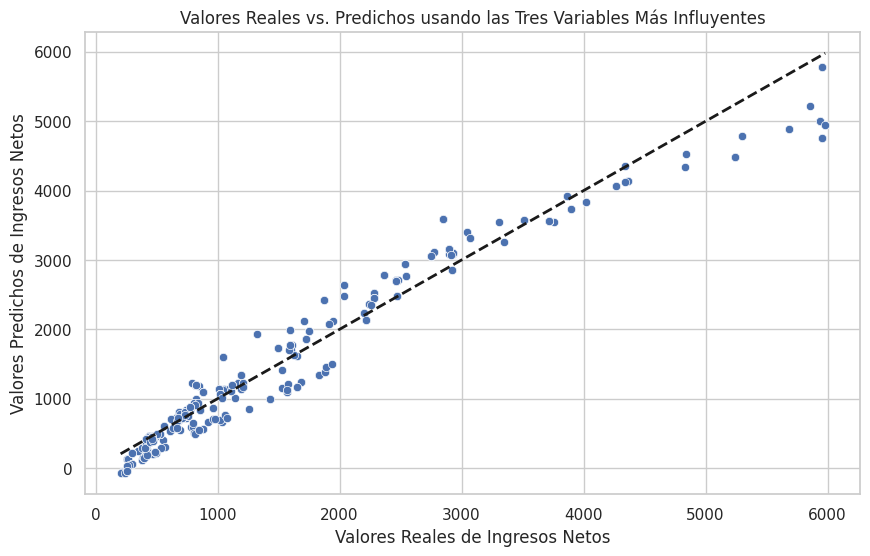

In [ ]:
# Extraer las 3 caracteristica mas importantes
top_features = importance_df.iloc[:3]['Características'].tolist()
print(f'Las tres variables más influyentes son: {top_features}')

# Seleccionar solo las tres variables más influyentes
X_top_features = df[top_features]
y = df['ingreso_neto_($/ha)']

# Crear un preprocesador que solo escale las variables numéricas
scaler = StandardScaler()

# Aplicar la escalación a las variables numéricas
X_scaled = scaler.fit_transform(X_top_features)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'R^2 Score en el conjunto de entrenamiento: {train_r2}')
print(f'R^2 Score en el conjunto de prueba: {test_r2}')
print(f'Mean Squared Error en el conjunto de entrenamiento: {train_mse}')
print(f'Mean Squared Error en el conjunto de prueba: {test_mse}')

# Extraer el modelo de regresión lineal entrenado
regressor = model

# Obtener los coeficientes y el intercepto del modelo
coefficients = regressor.coef_
intercept = regressor.intercept_

# Mostrar los coeficientes y el intercepto
print("Intercepto:", intercept)
print("Coeficientes:", coefficients)
print("Variables:", top_features)

# Fórmula de la regresión lineal
formula = f"Ingresos Netos = {intercept}"
for coef, feature in zip(coefficients, top_features):
    formula += f" + ({coef} * {feature})"

print("Fórmula de la Regresión Lineal:")
print(formula)

# Gráfico de dispersión de los valores predichos frente a los valores reales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel('Valores Reales de Ingresos Netos')
plt.ylabel('Valores Predichos de Ingresos Netos')
plt.title('Valores Reales vs. Predichos usando las Tres Variables Más Influyentes')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

## Conclusión

<p align="justify">
En este proyecto se evaluó la producción de carne bovina en la República Argentina tomando una base de datos de la plataforma Kaggle. En la misma se encuentra la producción de carne desde el año 2015 al 2018 discriminada por departamentos provinciales, entre otros datos relevantes. En este análisis se toma la productividad porque los valores correspondientes a costos e ingresos poseen una alta variabilidad. Además, quien realiza el estudio no es especialista en el mercado ni en la producción de carne.   
</p>
<p align="justify">
En el presente trabajo se buscó realizar una representación gráfica de la productividad en cada provincia de la Argentina. Tanto en los gráficos de barra como en el mapa de calor, la mayor productividad se encuentra en las provincias de Entre Ríos, Buenos Aires, Córdoba y La Pampa. Como se puede observar en el mapa de calor, la producción se extiende en gran parte de la superficie de las provincias mencionadas. Dentro de las actividades, la mayor producción se realiza para la invernada, seguida de ciclo completo y cría. La relación entre la productividad y la carga (kg/ha) tiene un alto coeficiente de correlación lineal, aunque para que se pueda asegurar dicha relación debería ser mayor a 0,97. De igual manera, se podría inferir, que hay mucha probabilidad que al aumentar la carga aumentaría la productividad en los campos. Se debe considerar que los datos son hasta el 2018 y en la actualidad los factores económico podrían cambiar completamente los resultados que se han expuesto en este trabajo.  
</p>
<p align="justify">
Las tres variables que tienen el impacto más significativo sobre los ingresos netos son la carga, costos indirectos y margen bruto. Siendo la carga (kg/ha) la que presenta la mayor importancia sobre los ingresos netos. El modelo se ajusta muy bien, ya que el R^2 tiene un valor muy cercano a 1 (el valor que dio fue de  0.9998). Esto no solo es para el conjunto de entrenamiento (R^2 = 0.9999), sino también en el conjunto de prueba. En los resultados de validación cruzada, se obtuvo un valor de R^2 por encima de 0,90 para todos los subconjuntos de los datos, lo cual es muy bueno. Pero se observa mucha variabilidad entre el valor de R^2 mas bajo (R^2 = 0.9057) y el más alto (R^2 = 0.9841) de los subconjuntos. Esto sugiere que el modelo puede tener un rendimiento algo variable dependiendo del subconjunto de datos con el que se entrene y evalúe. El promedio de los puntajes de validación cruzada es 0.9573, lo que indica que en general, el modelo explica aproximadamente el 95.73% de la variabilidad en los datos de salida en los diferentes subconjuntos de datos.
</p>

<p align="justify">
Utilizando machine learning se llego a la siguiente formula para predecir los ingresos netos por hectárea:

**Ingresos_netos(dólares/ha) = 1584.720345585699 + (362.9799816207857 * carga_(kg/ha)) + (699.2024292743457 * costos_indirectos_(dólares/ha)) + (364.52465605827854 * margen_bruto_(dólares/ha))**
</p>
<p align="justify">
Si bien la variable carga es la mas influyente sobre los ingresos netos, en soledad, no alcanza para predecir correctamente los ingresos. Es necesario utilizar las tres variables más influyentes (carga, costos indirectos y margen bruto) para lograr un mejor ajuste del modelo. Sin embargo, el valor del R^2 es 0,95, el cual es considerado bajo para que el ajuste sea óptimo. Si nos fijmos en la gráfica de Valores predichos de ingresos netos vs valores reales de ingresos netos se puede observar que hasta 4000 dólares por hectárea no hay una dispersión muy alta entre ambos valores. Pero ya si subimos por encima de este valor la diferencia entre valores predichos y reales aumenta. Por lo tanto, esta formula se podría utilizar para realizar una primera y tentativa estimación, teniendo en cuenta que el ajuste nos es óptimo. Debiendo ser utilizada para predecir ingresos netos menores o iguales a 4000 dólares por hectárea.  
</p>